In [5]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv(r'/content/drive/MyDrive/oasis/Unemployment in India.csv')

In [8]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
# Display the information about the DataFrame, including column data types and non-null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [10]:
# Remove extra spaces from column names
df.columns = df.columns.str.strip()

# Print the cleaned column names
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [11]:
# Display the number of missing values in each column
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


In [12]:
# Fill missing values in categorical columns with the mode
categorical_columns = ['Region', 'Date', 'Frequency', 'Area']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
# Fill missing values in numerical columns with the mean
numerical_columns = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())


In [14]:
# Verify if there are any missing values after handling
print("Number of missing values after handling:")
print(df.isnull().sum())

Number of missing values after handling:
Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64


*******

# **Distribution of Region**

<ipython-input-15-035479523391>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=df, palette='viridis')


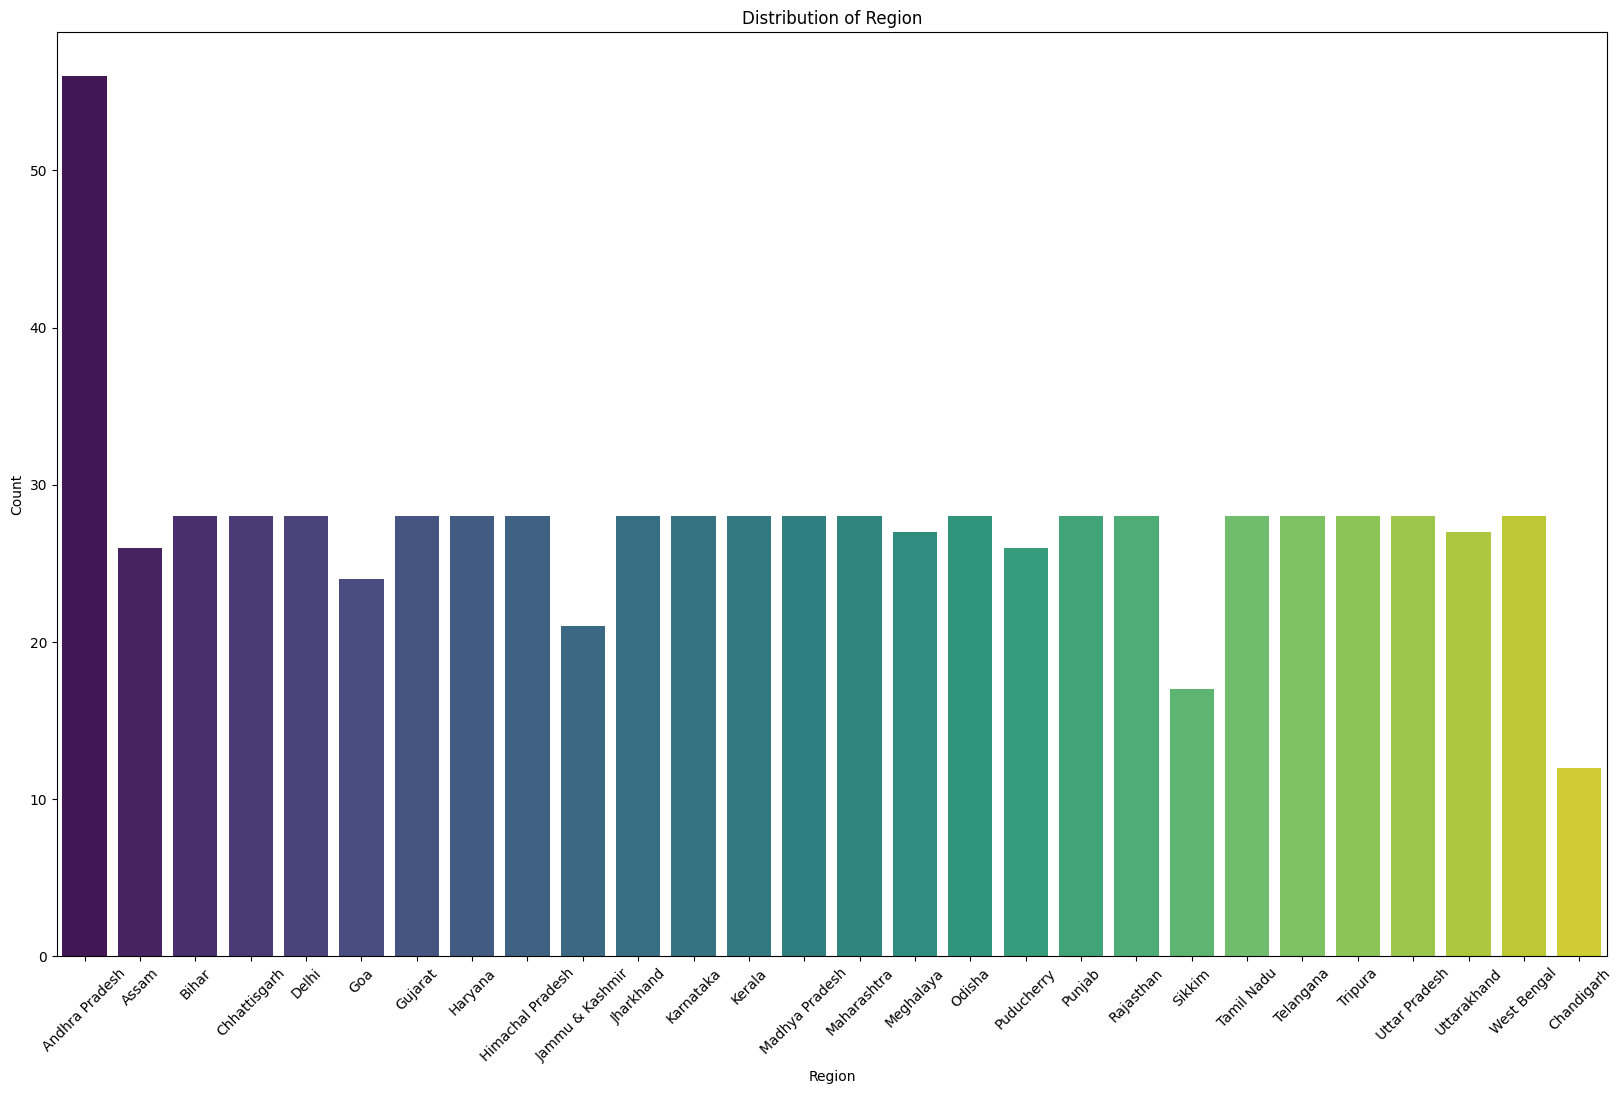

In [15]:
plt.figure(figsize=(20, 12))
sns.countplot(x='Region', data=df, palette='viridis')
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Distribution of Frequency**

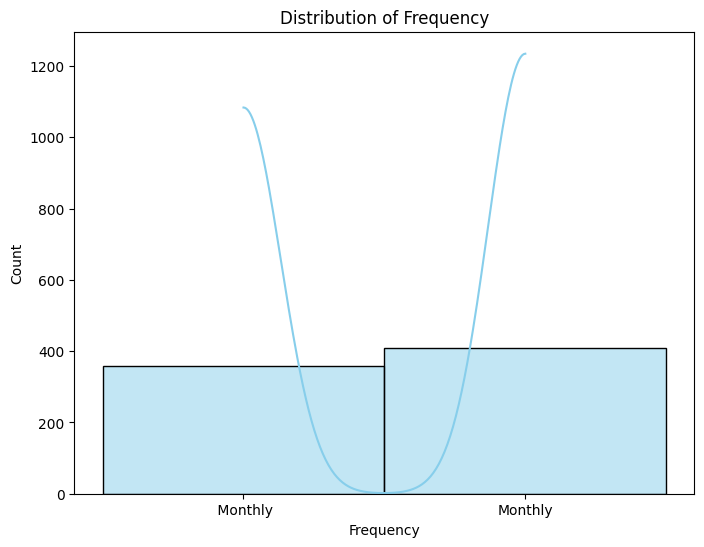

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Frequency'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# **Estimated Unemployment Rate (%) over time**

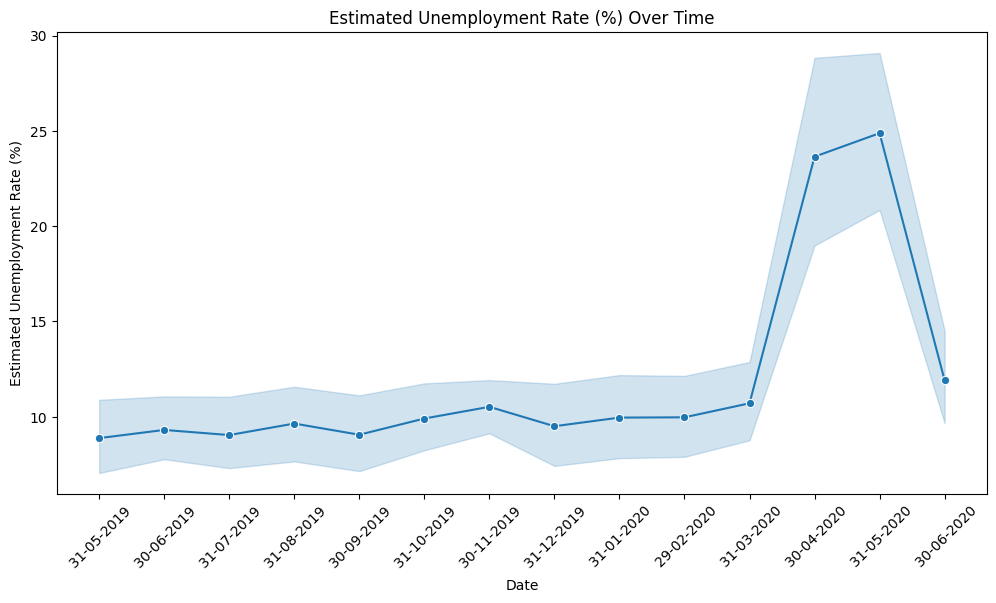

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df, marker='o')
plt.title('Estimated Unemployment Rate (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

# **Pie chart for Area distribution**

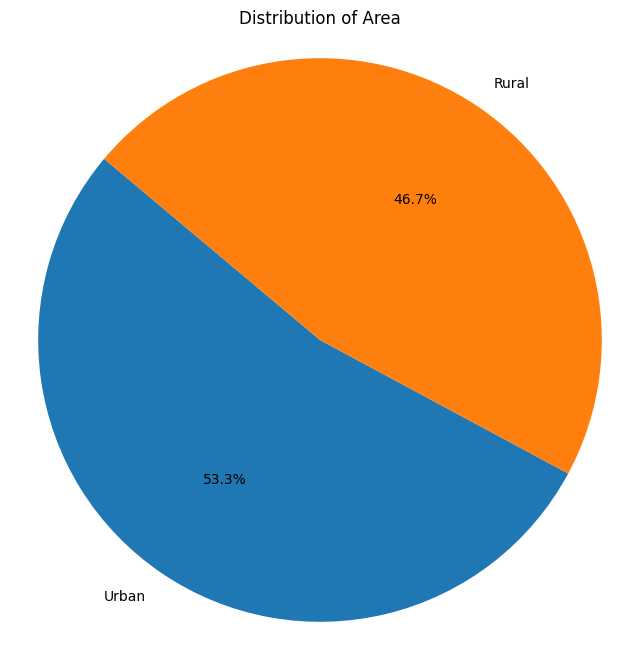

In [18]:
area_counts = df['Area'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(area_counts, labels=area_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Area')
plt.axis('equal')
plt.show()

# **Histograms for numerical variables**

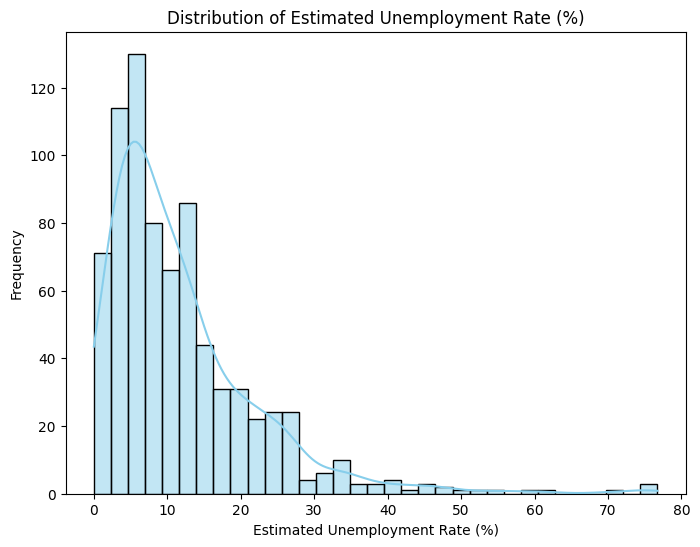

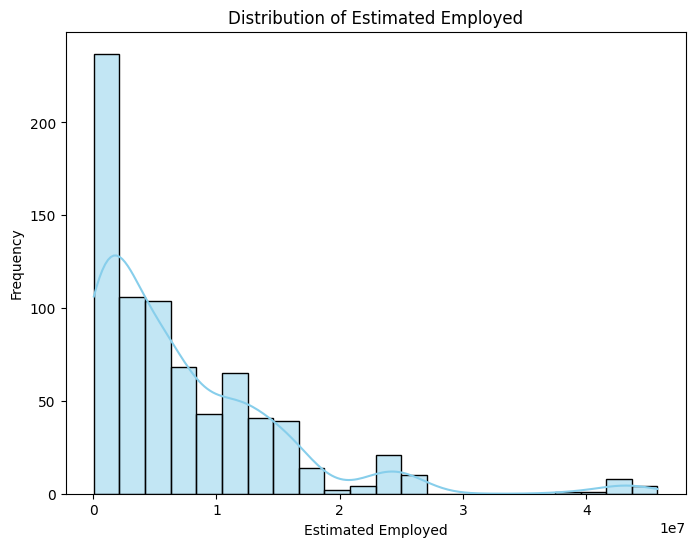

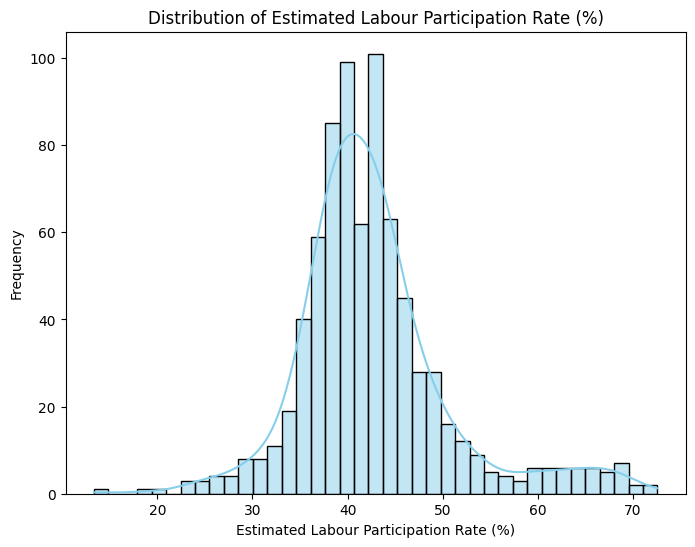

In [19]:
# Histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# **Pairplot of overall relationship**

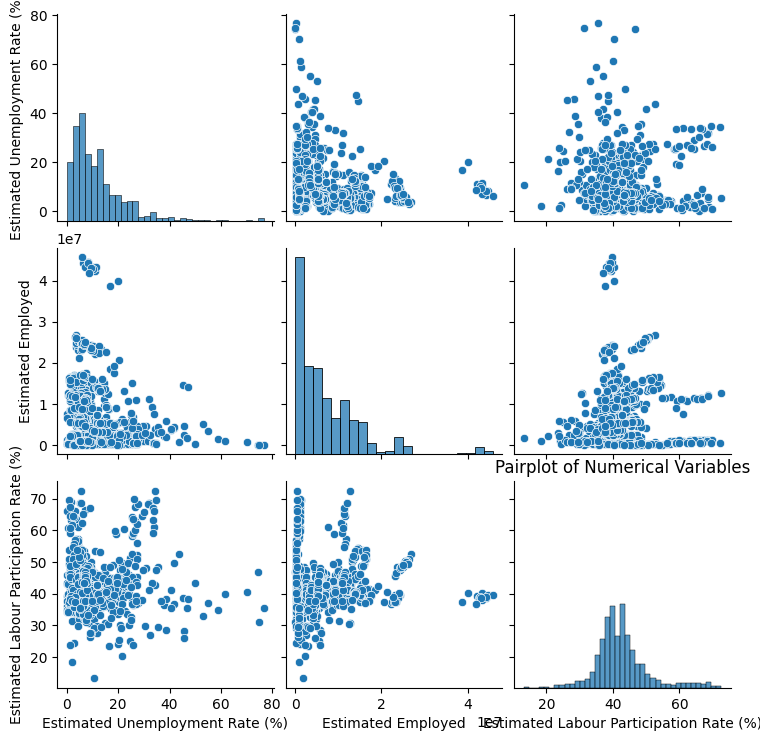

In [20]:
# Pairplot for numerical variables
sns.pairplot(df)
plt.title('Pairplot of Numerical Variables')
plt.show()

# **Boxplot of Estimated Employed by Region**

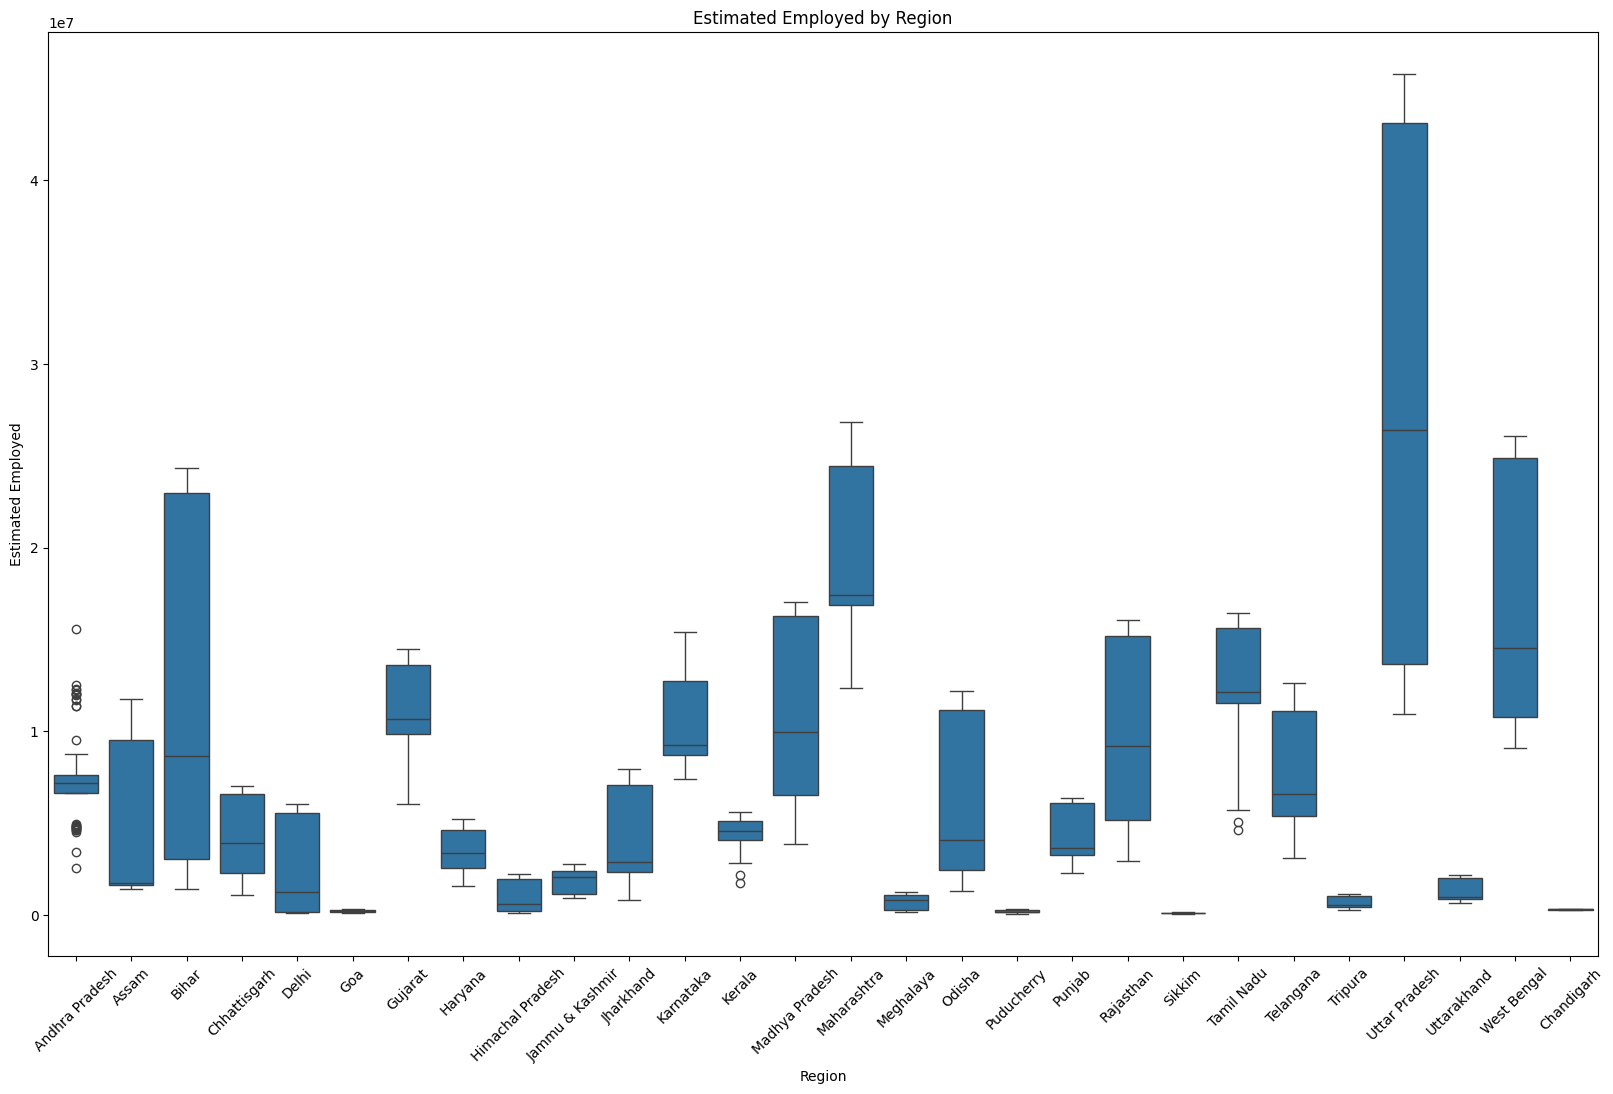

In [21]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='Region', y='Estimated Employed', data=df)
plt.title('Estimated Employed by Region')
plt.xlabel('Region')
plt.ylabel('Estimated Employed')
plt.xticks(rotation=45)
plt.show()


# **Correlation Matrix**

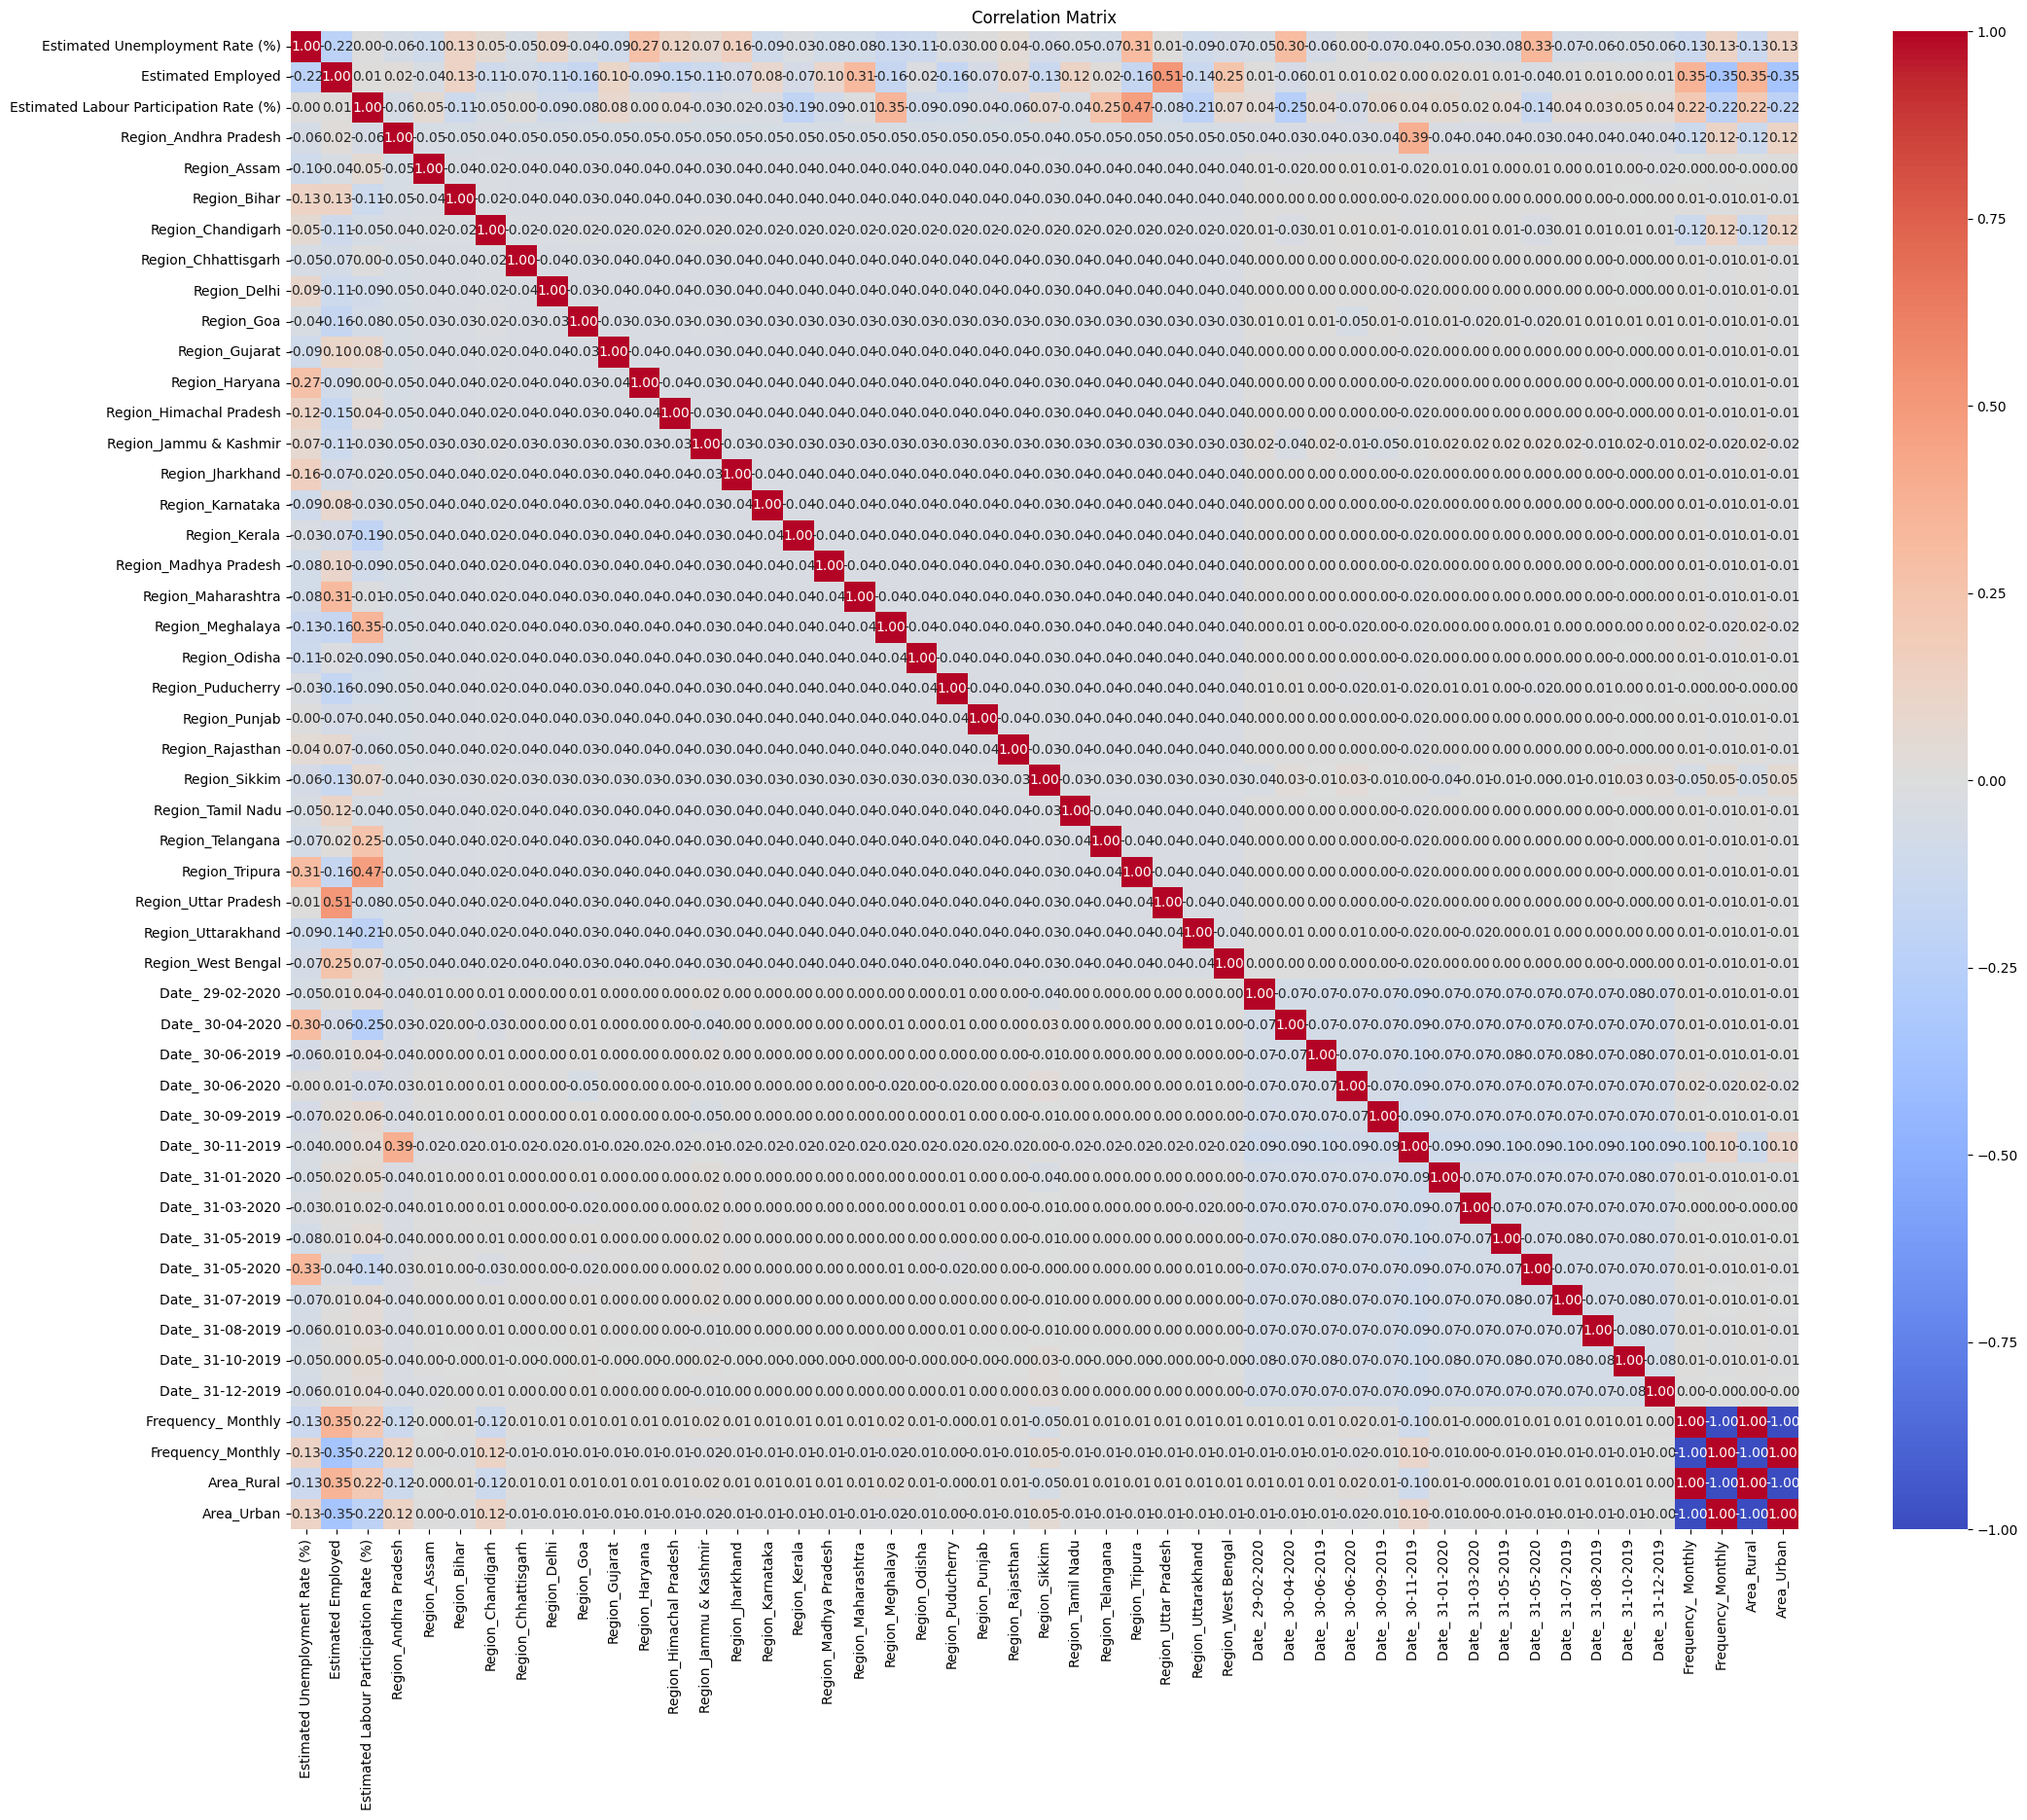

In [22]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Plot correlation matrix
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **Relationship between unemployment rate, employed, and region**

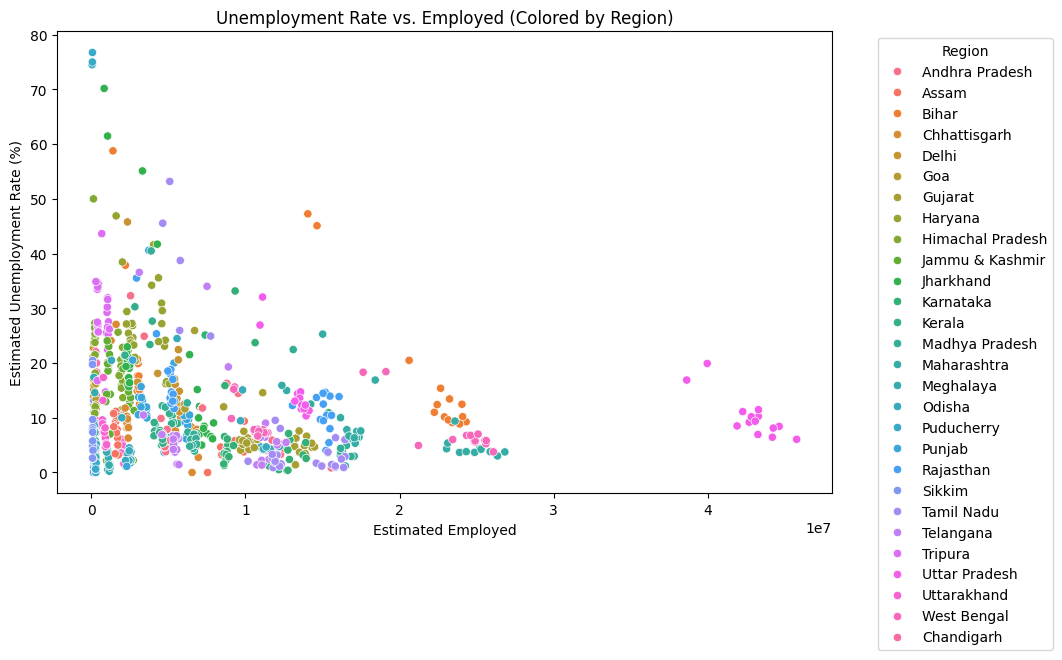

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', hue='Region', data=df)
plt.title('Unemployment Rate vs. Employed (Colored by Region)')
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **Trend of unemployment rate over time**

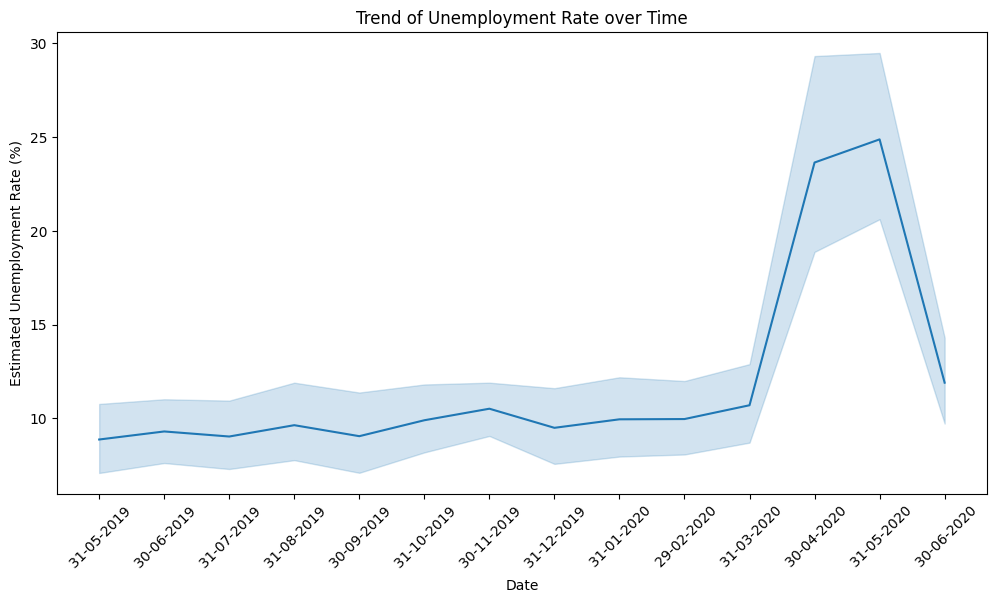

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=df)
plt.title('Trend of Unemployment Rate over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()